In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [4]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
x= df.iloc[:,:-2].values
y=df.iloc[:,-1].values

In [6]:
x

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [7]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [8]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(xtrain,ytrain)
ypred = linreg.predict(xtest)

In [10]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

print(f'mae = {mae(ytest,ypred)}')
print(f'mse = {mse(ytest,ypred)}')
print(f'rmse = {np.sqrt(mse(ytest,ypred))}')
print(f'Accuracy = {r2_score(ytest,ypred)}')

mae = 7659.119032814694
mse = 79195300.72807212
rmse = 8899.174159891025
Accuracy = 0.9650940934427323


In [11]:
linreg.coef_

array([ 0.7742023 , -0.00877164,  0.02934891])

In [12]:
linreg.intercept_

49659.15773318634

<AxesSubplot:ylabel='Density'>

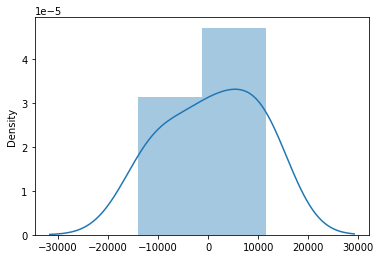

In [13]:
sns.distplot((ytest-ypred))

<AxesSubplot:>

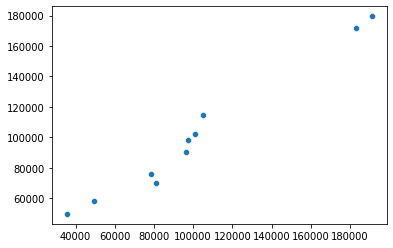

In [14]:
sns.scatterplot(ytest,ypred)

In [15]:
dic = {'y':ytest,'Yp':ypred}
xy = pd.DataFrame(dic)
xy

,y,Yp
0,105008.31,114729.007682
1,96479.51,90569.032313
2,78239.91,75952.348616
3,81229.06,70179.811176
4,191050.39,179539.151879
5,182901.99,171638.156375
6,35673.41,49624.941932
7,101004.64,102253.124756
8,49490.75,58381.679070
9,97483.56,98240.747247


In [16]:
x = df.iloc[:,:-2]
y = df.iloc[:,-1]

In [17]:
x

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [18]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [19]:
x.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')

In [20]:
df_coef = pd.DataFrame(linreg.coef_,x.columns,columns=["Coefficient"])
df_coef

,Coefficient
R&D Spend,0.774202
Administration,-0.008772
Marketing Spend,0.029349


In [21]:
df = pd.read_csv('advertising.csv')
df.head

<bound method NDFrame.head of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [23]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [24]:
x= df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [26]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain,ytrain)
ypred= linreg.predict(xtest)

In [27]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
mae = mae(ytest,ypred)
mse = mse(ytest,ypred)
rmse = np.sqrt(mse)
r2_score = r2_score(ytest,ypred)

print('MAE :',mae)
print('MSE :',mse)
print('RMSE :',rmse)
print('Accuracy :',r2_score)

MAE : 1.0548328405073315
MSE : 1.9289249074665713
RMSE : 1.3888574107756964
Accuracy : 0.9224605706201435


In [28]:
df_coef = pd.DataFrame(linreg.coef_,x.columns,columns=["Coefficient"])
df_coef

,Coefficient
TV,0.046952
radio,0.176586
newspaper,0.001851


-For every unit growth in Average Television Advertising ,we estimate that Sales will grow by $46K 

-For every unit growth in Average Radio Advertising, we estimate that the sales will grow ny $177K

In [29]:
df.corr().style.background_gradient()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000
